In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1 - Support vector machines

The [support vector machine (SVM)](https://en.wikipedia.org/wiki/Support-vector_machine) is a commonly-used machine learning model which uses an optimizer like the gradient descent algorithm you just implemented to help classify data.

Suppose you have a collection of elements of $\mathbb{R}^k$ called *data points*, each of which has a known *type* which is either 1 or -1.  This is called the *training data*.  You want to use these points to generate a *classifier* which, given a new data point, will tell you whether it is most likely to be of type 1 or of type -1.    For example, perhaps the points are derived from images of cats (type 1) and dogs (type -1), and you want to decide whether a new image is of a cat or of a dog.

The simplest kind of SVM finds a *hyperplane* (a line in 2D space, a plane in 3D space, and so on) such that, as far as possible, all the type 1 training points are on one side of the hyperplane and all the type -1 training points are on the other side.  Given a new data point we then predict its type by simply checking which side of the hyperplane it lies on.

Of course, in general it will not be possible to find any hyperplane that has all the type 1 points on one side and all the type -1 points on the other.  In that case the method finds the "best" hyperplane in a sense made precise by the loss function defined later.


In [ ]:
def generate_random_data(x0, y0, spread, n):
    '''
    Function to generate random data points with a given centre and spread.

    Inputs:
    x0: x-coordinate of the centre of the data points, float
    y0: y-coordinate of the centre of the data points, float
    spread: the spread of the data points, float
    n: the number of data points to generate, int

    Outputs:
    random_data: a numpy array of shape (n, 2) containing the generated data points
    '''
    random_data = 2 * np.random.sample(size=2 * n) - 1
    random_data = random_data.reshape(n, 2)
    random_data = np.multiply(random_data, spread)
    
    random_data += np.array([x0, y0])
    return random_data

### Plot with small spread.

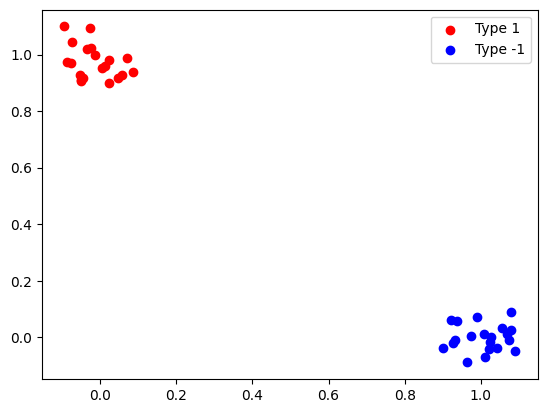

In [7]:
data1 = generate_random_data(0, 1, 0.1, 20)
data2 = generate_random_data(1, 0, 0.1, 20)

plt.scatter(data1[:, 0], data1[:, 1], c='red', label='Type 1')
plt.scatter(data2[:, 0], data2[:, 1], c='blue', label='Type -1')
plt.legend()
plt.show()

### Plot with larger spread.

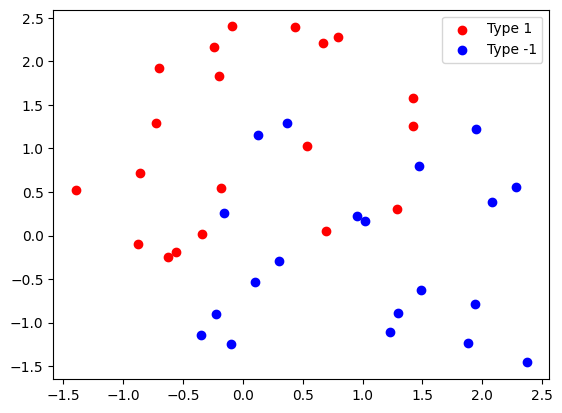

In [8]:
data1 = generate_random_data(0, 1, 1.5, 20)
data2 = generate_random_data(1, 0, 1.5, 20)

plt.scatter(data1[:, 0], data1[:, 1], c='red', label='Type 1')
plt.scatter(data2[:, 0], data2[:, 1], c='blue', label='Type -1')
plt.legend()
plt.show()

# Part 2 - the SVM loss function

Suppose we have *training data* consisting of $n$ vectors $ \mathbf{x}_1 , \cdots, \mathbf{x}_n \in \mathbb{R}^k $ and that each $\mathbf{x}_i$ has a *type* $\textit{y}_i$ which is either 1 or -1. Data is called *linearly separable* if there exists a hyperplane such that all type 1 points are on one side and all type -1 points are on the other side.

When the data is linearly separable we can choose a hyperplane with all type 1 points above it and all type 2 are below it. This hyperplane can be used as a classifer: if a new point is on the same side as the type 1 points we will classify the new point as type 1, and if it is on the other side it is classified as type -1.

Mathematically we have that any hyperplane in $\mathbb{R} ^ k$ can be written as the set of all points $\mathbf{x}$ such that $\mathbf{w ^ T} \mathbf{x} = b$, for some vector $\mathbf{w}$ and some scalar $b$. The hyperplane divideds $\mathbb{R}^k$ into two pieces: points $u$ for which $\mathbf{w ^ T} \mathbf{u} > b$ and points for which $\mathbf{w ^ T} \mathbf{u} < b$. Assume that the type 1 points $\mathbf{x}_i$ satisfy $\mathbf{w}^T \mathbf{x}_i >b$. In that case, the classifier says that a new point $\mathbf{u}$ has type 1 if $\mathbf{w}^T \mathbf{u} > b$, and that it has type -1 otherwise.

When data is linearly separable there may be many different hyperplanes which separate the two types of datapoint. The choice of hyperplane affects how the classifier performs, so we must choose it carefully.  One possibility is to use the separating hyperplane with the widest *margin*.  Consider the hyperplane $\mathbf{w}^T \mathbf{x} = b$.  There is another, parallel hyperplane $\mathbf{w}^T \mathbf{x} = b+1$ above it and another, parallel hyperplane $\mathbf{w}^T \mathbf{x} = b-1$ below it.  The area between these is called the margin, and we can then look for the hyperplane that maximises the width of the margin subject to all of the positive and negative datapoints being outside it.

For a vector $\mathbf{u} = \begin{pmatrix} u_1 \\ \vdots \\ u_k \end{pmatrix}$ we define $||\mathbf{u}||$, the length of $\mathbf{u}$, to be $\sqrt{\sum_{i=1}^k u_i^2}$.  It turns out that the width of the margin is equal to $2/||\mathbf{w}||$, so maximising the width of the margin is equivalent to minimising $||\mathbf{w}||$ subject to the constraint that all type 1 data points $\mathbf{x}_+$ satisfy $\mathbf{w}^T \mathbf{x}_+ \geqslant b+1$ (that is, they are above the margin) and all type -1 datapoints $\mathbf{x}_-$ satisfy $\mathbf{w}^T \mathbf{x}_- \leqslant b - 1$ (that is, they are below the margin).

In general the data we work with may not be linearly separable. Consider the example above where the spread is high.

There is no straight line which separates the red and blue dots.  To help us make a classifier, recall that a vector $\mathbf{u}$ lies above the margin if $\mathbf{w}^T \mathbf{u} \geqslant b + 1$ and below it if $\mathbf{w}^T \mathbf{u} \leqslant b - 1$.  A type 1 point $\mathbf{x}_i$ is above the margin if $\mathbf{w}^T\mathbf{x}_i \geqslant b+1$, that is, $\mathbf{w}^T\mathbf{x}_i - b \geqslant 1$ and a type -1 point $\mathbf{x}_i$ is below the margin if $\mathbf{w}^T \mathbf{x}_i \leqslant b - 1$, that is $\mathbf{w}^T\mathbf{x}_i -b\geqslant 1$.  Letting $y_i=1$ if $\mathbf{x}_i$ is type 1 and $y_i=-1$ if $\mathbf{x}_i$ is type -1, we can summarise this by saying all data points $\mathbf{x}_i$ are on the correct side of the margin if and only if all of the inequalities

$$ y_i(\mathbf{w}^T \mathbf{x}_i -b) \geq 1$$

are true, or equivalently, if $1-y_i(\mathbf{w}^T \mathbf{x}_i - b) \leq 0$ for all $i$. Thus the sum

$$ \sum_{i=1}^n \max(0, 1-y_i(\mathbf{w}^T \mathbf{x}_i - b)) $$

is a nonnegative quantity that is zero if all data points are on the correct sides of the margins $\mathbf{w}^T \mathbf{x}  =b \pm 1$ and which gets bigger as points get further away from the correct side of the margin.  This is called the [hinge loss](https://en.wikipedia.org/wiki/Hinge_loss)

The SVM classifier then needs to make a tradeoff between making $||\mathbf{w}||$ small and making $$ \sum_{i=1}^n \max(0, 1-y_i(\mathbf{w}^T \mathbf{x}_i - b)) $$ small so that points are close to being on the right side of the margins.  It does this by choosing a constant $\lambda$ and minimizing the **loss function**

$$\lambda ||\mathbf{w}||^2 + \frac{1}{n}\sum_{i=1}^n \max(0, 1-y_i(\mathbf{w}^T \mathbf{x}_i - b)).$$

The parameter $\lambda$ determines the tradeoff between margin size and classification error.  If we don't mind having a small margin but hate having points on the wrong side of the margin we make $\lambda$ small; if we absolutely must have a big margin but don't care about a few mis-classified training points we make $\lambda$ big. You can read more details about this loss function and some applications of the SVM on [Andrew Zisserman](https://www.robots.ox.ac.uk/~az/lectures/ml/index.html)'s [lecture slides](https://www.robots.ox.ac.uk/~az/lectures/ml/lect2.pdf).

In [ ]:
l = 0.01

def loss(bw, data):
    """
    Function to compute the loss function for the SVM.

    Inputs:
    bw: a numpy array of shape (2,) containing the parameters of the hyperplane
    data: a dictionary with keys that are points and values that are types

    Outputs:
    loss: the loss function value
    """
    if not isinstance(bw, np.ndarray):
        raise ValueError("bw must be a numpy array, whose first element is b and the other entries are elements of the vector w")
    if bw.ndim != 1:
        bw = bw.squeeze()
    
    if not isinstance(data, dict):
        raise ValueError("data must be a dictionary with keys that are points and values that are types")


    b = bw[0] # b is the first element of bw
    w = bw[1:] # w is the rest of the elements of bw

    n = len(data)
    loss = 0
    
    for x, y in data.items():
        loss += max(0, 1 - y * (np.dot(w, x) + b))
    rhs = loss / n
    lhs = l * np.linalg.norm(w)**2
    return lhs + rhs





In [14]:
from scipy.optimize import minimize

In [73]:
def svm_demo(n, redCentre, blueCentre, spread):
    """
    Function to demonstrate the SVM classifier.

    Inputs:
    n: the number of data points to generate, int
    redCentre: the centre of the red data points, list of two floats
    blueCentre: the centre of the blue data points, list of two floats
    spread: the spread of the data points, float
    
    """
    x0, y0 = redCentre
    red_data = generate_random_data(x0, y0, spread, n)
    x1, y1 = blueCentre
    blue_data = generate_random_data(x1, y1, spread, n)

    data = {}
    for i in range(n):
        data[tuple(red_data[i])] = 1
    for i in range(n):
        data[tuple(blue_data[i])] = -1

    bw0 = np.random.randn(3)
  
    min_loss = minimize(loss, bw0, args=(data,))

    bw = min_loss.x
    b = bw[0]
    w = bw[1:]

    # Create the plot
    plt.figure(figsize=(10, 8))
    
    # Plot data points
    plt.scatter(red_data[:, 0], red_data[:, 1], c='red', label='Type 1', alpha=0.7, s=50)
    plt.scatter(blue_data[:, 0], blue_data[:, 1], c='blue', label='Type -1', alpha=0.7, s=50)
    
    # Define hyperplane: w[0]*x + w[1]*y + b = 0
    # Solving for y: y = -(w[0]*x + b) / w[1]
    def hyperplane(x):
        return -(w[0] * x + b) / w[1]
    
    # Define margin boundaries: w[0]*x + w[1]*y + b = ±1
    def margin_upper(x):
        return -(w[0] * x + b - 1) / w[1]
    
    def margin_lower(x):
        return -(w[0] * x + b + 1) / w[1]
    
    # Create x range for plotting
    x_min, x_max = min(np.min(red_data[:, 0]), np.min(blue_data[:, 0])) - 0.5, \
                   max(np.max(red_data[:, 0]), np.max(blue_data[:, 0])) + 0.5
    x_range = np.linspace(x_min, x_max, 100)
    
    # Plot hyperplane and margins
    plt.plot(x_range, hyperplane(x_range), 'k-', linewidth=2, label='Decision Boundary')
    plt.plot(x_range, margin_upper(x_range), 'k--', linewidth=1, label='Margin')
    plt.plot(x_range, margin_lower(x_range), 'k--', linewidth=1)
    
    # Fill margin area
    plt.fill_between(x_range, margin_lower(x_range), margin_upper(x_range), 
                     alpha=0.2, color='gray', label='Margin')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'SVM Classification (λ={l})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()
    
    # Print SVM parameters
    print(f"SVM Parameters:")
    print(f" b : {b:.4f}")
    print(f" w : [{w[0]:.4f}, {w[1]:.4f}]")
    print(f"  Margin width: {2/np.linalg.norm(w):.4f}")
    print(f"  Final loss: {min_loss.fun:.4f}")
    
    
    

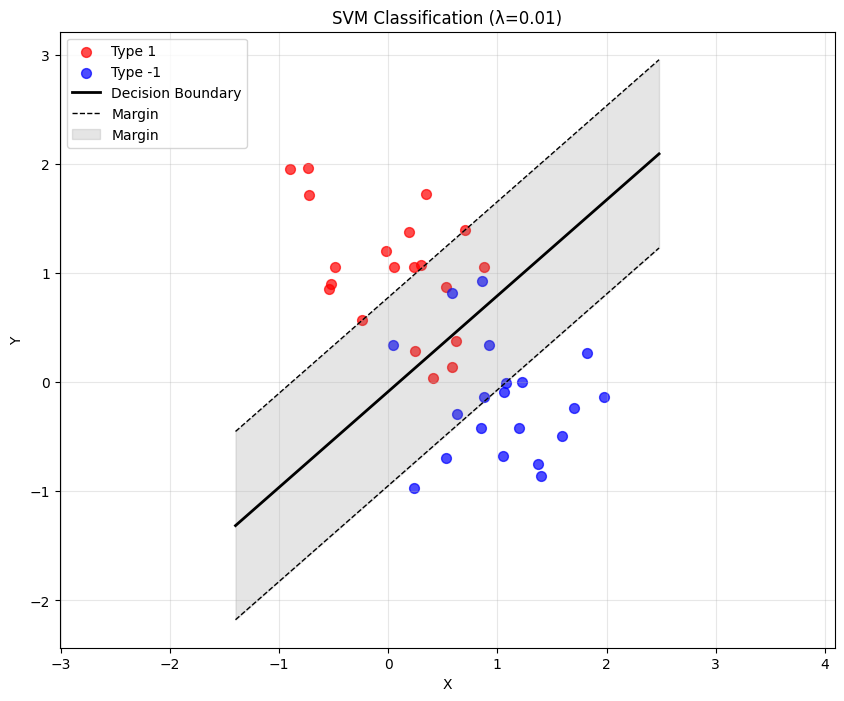

SVM Parameters:
 b : 0.0995
 w : [-1.0176, 1.1594]
  Margin width: 1.2965
  Final loss: 0.2853


In [81]:
svm_demo(20, [0, 1], [1, 0], 1)